# 1. Why do you use feature selection?
**Answer:**

Feature selection is used to identify and select the most relevant features (or variables) in a dataset. This helps in improving the model's performance by reducing overfitting, enhancing the model's interpretability, and decreasing computational complexity.

In [1]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Apply feature selection
# Select the top 2 features with the highest ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Selected features
print(f"Original features: {X.shape[1]}")  # Original number of features
print(f"Selected features: {X_selected.shape[1]}")  # Number of selected features


Original features: 4
Selected features: 2


# 2. What is the effect on the coefficients of logistic regression if two predictors are highly correlated?
**Answer:**

When two predictors are highly correlated, it can cause multicollinearity, which makes the logistic regression coefficients unstable and difficult to interpret. This can result in large standard errors for the coefficients and potentially incorrect conclusions about the importance of predictors.

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Create a dataset with highly correlated features
np.random.seed(0)
X1 = np.random.normal(0, 1, 100)
X2 = X1 + np.random.normal(0, 0.1, 100)  # Highly correlated with X1
X3 = np.random.normal(0, 1, 100)
y = np.random.choice([0, 1], size=100)

# Create DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

# Fit logistic regression model
model = LogisticRegression()
model.fit(df, y)

# Coefficients
print("Logistic Regression Coefficients:")
print(model.coef_)


Logistic Regression Coefficients:
[[ 0.22100144 -0.22018728 -0.20938985]]


# 3. What are the confidence intervals of the coefficients?
**Answer:**

The confidence intervals of the coefficients represent the range within which we can be confident that the true coefficient values lie. Typically, a 95% confidence interval is used, meaning there's a 95% chance that the true coefficient lies within this interval.

In [3]:
import statsmodels.api as sm

# Fit logistic regression model with statsmodels
X = sm.add_constant(df)  # Add intercept
logit_model = sm.Logit(y, X).fit()

# Get confidence intervals
conf_intervals = logit_model.conf_int()
print("Confidence Intervals for Coefficients:")
print(conf_intervals)


Optimization terminated successfully.
         Current function value: 0.682950
         Iterations 4
Confidence Intervals for Coefficients:
              0         1
const -0.396754  0.400303
X1    -1.976230  5.877728
X2    -5.785145  1.942277
X3    -0.635037  0.210009


# 4. What’s the difference between Gaussian Mixture Model and K-Means?
**Answer:**

K-Means: Clusters data by minimizing the variance within each cluster. It assigns each data point to exactly one cluster, assuming spherical clusters of equal size.
Gaussian Mixture Model (GMM): A probabilistic model that assumes data points are generated from a mixture of several Gaussian distributions. It provides soft clustering, meaning each data point has a probability of belonging to each cluster.

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, random_state=0)

# K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(X)

# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=3)
gmm_labels = gmm.fit_predict(X)

print("K-Means labels:")
print(kmeans_labels[:10])  # Print first 10 labels

print("GMM labels:")
print(gmm_labels[:10])  # Print first 10 labels


K-Means labels:
[2 1 2 0 0 0 2 2 0 2]
GMM labels:
[2 0 2 1 1 1 2 2 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# 5. How do you pick k for K-Means?
**Answer:**

The value of k can be chosen using the Elbow Method or Silhouette Score:

Elbow Method: Plot the within-cluster sum of squares (WCSS) for different values of k and choose the value where the WCSS starts to diminish rapidly ("elbow point").
Silhouette Score: Measures how similar a point is to its own cluster compared to other clusters. The optimal k maximizes the silhouette score.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

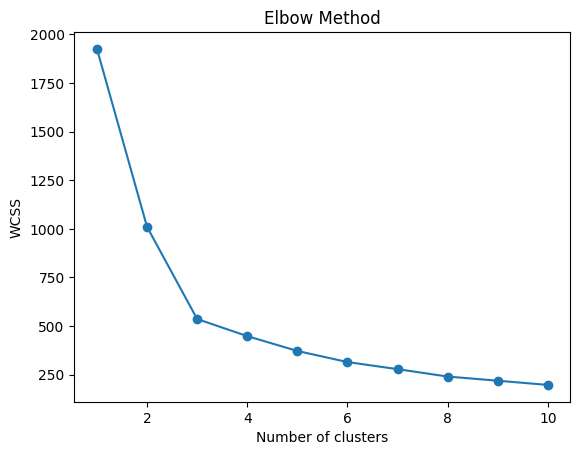

Silhouette Score for k=3: 0.4841542003442777


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score for k=3
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score for k=3: {sil_score}")


# 6. How do you know when Gaussian Mixture Model is applicable?
**Answer:**

GMM is applicable when the data seems to be generated from multiple Gaussian distributions, especially if the clusters have different shapes, sizes, or covariance structures. GMM is also useful when soft clustering (probability of belonging to each cluster) is more appropriate than hard clustering.

In [8]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification

# Generate sample data that is likely to be from a GMM
X, _ = make_classification(
    n_samples=300,
    n_features=2,  # Total number of features
    n_informative=2,  # Number of informative features
    n_redundant=0,  # No redundant features
    n_clusters_per_class=1,
    n_classes=3,
    random_state=0
)

# Fit GMM
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

# Check if GMM is applicable (convergence)
print(f"Converged: {gmm.converged_}")


Converged: True


# 7. Assuming a clustering model’s labels are known, how do you evaluate the performance of the model?
**Answer:**

When the true labels are known, clustering performance can be evaluated using Adjusted Rand Index (ARI), Normalized Mutual Information (NMI), or Fowlkes-Mallows Index (FMI), which compare the predicted clusters with the true labels.

In [7]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score

# True labels (assuming known)
true_labels = _

# Predicted labels from a clustering model (e.g., K-Means)
predicted_labels = kmeans_labels

# Evaluate performance
ari = adjusted_rand_score(true_labels, predicted_labels)
nmi = normalized_mutual_info_score(true_labels, predicted_labels)
fmi = fowlkes_mallows_score(true_labels, predicted_labels)

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")
print(f"Fowlkes-Mallows Index (FMI): {fmi}")


Adjusted Rand Index (ARI): 0.7667434002939801
Normalized Mutual Information (NMI): 0.7022606811801029
Fowlkes-Mallows Index (FMI): 0.8440775273265899


# 8. How would you find an anomaly in a distribution?
**Answer:**

Anomalies in a distribution can be identified using various methods, such as statistical methods (e.g., z-score, IQR), visualization techniques (e.g., box plots), or machine learning models like Isolation Forest or One-Class SVM. Anomalies are data points that significantly deviate from the majority of the data.

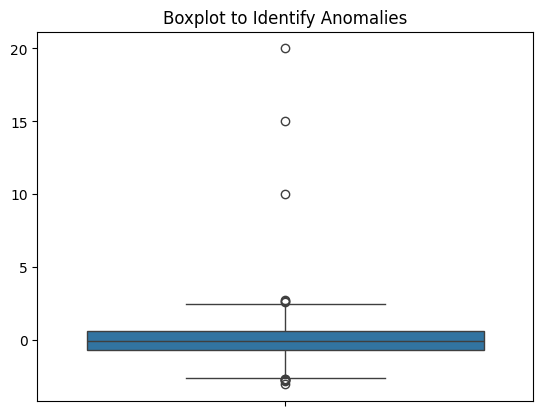

Anomalies found (indices): (array([1000, 1001, 1002]),)
Anomalies found (values): [10. 15. 20.]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generate data with an anomaly
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)  # Normal distribution
data = np.append(data, [10, 15, 20])  # Add some anomalies

# Method 1: Using z-score to find anomalies
z_scores = np.abs(stats.zscore(data))
threshold = 3  # Common threshold for z-score
anomalies = np.where(z_scores > threshold)

# Method 2: Visualization using a boxplot
sns.boxplot(data)
plt.title('Boxplot to Identify Anomalies')
plt.show()

# Print the indices and values of anomalies found by z-score
print("Anomalies found (indices):", anomalies)
print("Anomalies found (values):", data[anomalies])


# 9. How would you go about investigating if a certain trend in a distribution is due to an anomaly?
**Answer:**

To investigate if a trend in a distribution is due to an anomaly, you can:

**Visualize the Data:** Plot the data to identify any unusual trends or outliers.

**Segment the Data:** Divide the data into different segments (e.g., by time, category) to see if the trend persists across all segments.

**Statistical Tests:** Apply statistical tests (e.g., Grubbs' test, Dixon's Q test) to check if the observed trend is statistically significant or likely caused by anomalies.

**Remove Anomalies:** Temporarily remove the suspected anomalies and re-evaluate the trend to see if it persists.

**Domain Knowledge:** Use domain knowledge to understand if the observed trend is plausible or if it could be due to data quality issues.

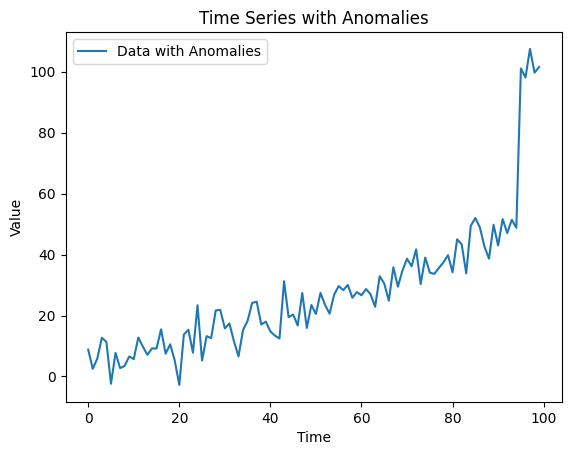

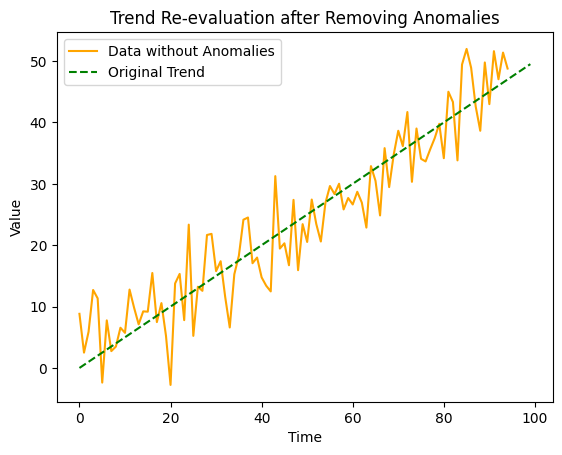

High Z-scores indicating potential anomalies: [0.71018638 1.1071761  0.89686577 1.09663815 0.9769463  3.38107922
 3.24394901 3.67538926 3.31674151 3.40303029]


In [10]:
import pandas as pd

# Generate synthetic data showing a trend with anomalies
np.random.seed(0)
time = np.arange(100)
trend = 0.5 * time  # Linear trend
noise = np.random.normal(loc=0, scale=5, size=100)
data = trend + noise

# Introduce anomalies
data[95:100] = data[95:100] + 50  # Sudden spike in the last few points

# Method 1: Visualize the trend
plt.plot(time, data, label='Data with Anomalies')
plt.title('Time Series with Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Method 2: Re-evaluate the trend after removing anomalies
# Let's assume we identify the anomalies (here, the last 5 points)
data_no_anomalies = data.copy()
data_no_anomalies[95:100] = np.nan  # Remove suspected anomalies for analysis

plt.plot(time, data_no_anomalies, label='Data without Anomalies', color='orange')
plt.plot(time, trend, label='Original Trend', linestyle='--', color='green')
plt.title('Trend Re-evaluation after Removing Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Method 3: Statistical test (example, Z-score test as in the previous code)
# See if the trend is due to significant anomalies
z_scores = np.abs(stats.zscore(data))
print("High Z-scores indicating potential anomalies:", z_scores[-10:])  # Check last 10 points


# 10. How would you build a model to predict credit card fraud?
**Answer:**

To build a model to predict credit card fraud, you would typically follow these steps:

**Data Collection:** Collect a dataset of credit card transactions labeled as fraudulent or non-fraudulent.

**Data Preprocessing:** Handle missing values, encode categorical variables, and normalize numerical features.

**Feature Engineering:** Create relevant features like transaction amount, transaction frequency, etc.

**Handling Imbalanced Data:** Use techniques like SMOTE (Synthetic Minority Over-sampling Technique), undersampling, or assigning class weights to handle the class imbalance typically found in fraud detection.

**Model Selection:** Choose a suitable model such as Logistic Regression, Random Forest, or XGBoost.

**Model Evaluation:** Use metrics like Precision, Recall, and the F1 score, as accuracy can be misleading in imbalanced datasets.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assume df is a DataFrame with features and a 'fraud' column as the target
# df = pd.read_csv('credit_card_transactions.csv')

# Split the data
X = df.drop('fraud', axis=1)
y = df['fraud']

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


KeyError: "['fraud'] not found in axis"

# 11. How do you handle missing or bad data?
**Answer:**

Handling missing or bad data involves several steps:

**Identify Missing Data:** Use .isnull() or .isna() to find missing values.

**Remove Missing Data:** Drop rows or columns with missing values if they are not critical or if too many values are missing.

**Impute Missing Data:** Replace missing values with the mean, median, mode, or use more sophisticated methods like K-Nearest Neighbors (KNN) imputation.

**Handle Outliers:** Remove or transform outliers if they are considered bad data.

**Domain-Specific Rules:** Apply domain-specific rules for handling bad data, such as correcting errors or filling in values based on business logic.

In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Sample DataFrame with missing values
data = {'A': [1, 2, None, 4, 5], 'B': [5, None, 3, None, 1]}
df = pd.DataFrame(data)

# Method 1: Drop rows with missing values
df_dropped = df.dropna()

# Method 2: Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Original DataFrame:")
print(df)
print("\nAfter Dropping Missing Values:")
print(df_dropped)
print("\nAfter Imputing Missing Values with Mean:")
print(df_imputed)


Original DataFrame:
     A    B
0  1.0  5.0
1  2.0  NaN
2  NaN  3.0
3  4.0  NaN
4  5.0  1.0

After Dropping Missing Values:
     A    B
0  1.0  5.0
4  5.0  1.0

After Imputing Missing Values with Mean:
     A    B
0  1.0  5.0
1  2.0  3.0
2  3.0  3.0
3  4.0  3.0
4  5.0  1.0


# 12. How would you derive new features from features that already exist?
Answer:

***Feature engineering*** involves creating new features from existing ones to improve model performance. Some techniques include:

**Mathematical Transformations:** Create new features by applying mathematical operations (e.g., sum, difference, product) on existing features.

**Aggregation:** Aggregate data over time or categories (e.g., mean, max, min).

**Date/Time Features:** Extract components like day, month, hour, or create features based on time differences.

**Interaction Features:** Create features that capture interactions between two or more features.

In [13]:
import pandas as pd

# Example DataFrame
data = {'price': [100, 150, 200, 250], 'quantity': [2, 3, 5, 7]}
df = pd.DataFrame(data)

# Derive new features
df['total_cost'] = df['price'] * df['quantity']  # Mathematical transformation
df['price_per_unit'] = df['price'] / df['quantity']  # Interaction feature

print("DataFrame with Derived Features:")
print(df)


DataFrame with Derived Features:
   price  quantity  total_cost  price_per_unit
0    100         2         200       50.000000
1    150         3         450       50.000000
2    200         5        1000       40.000000
3    250         7        1750       35.714286


# 13. If you’re attempting to predict a customer’s gender, and you only have 100 data points, what problems could arise?
**Answer:**

When predicting with a small dataset (e.g., 100 data points), several problems could arise:

**Overfitting:** The model may memorize the small dataset, leading to poor generalization on new data.

**Lack of Diversity:** The small dataset might not represent the diversity of the population, leading to biased predictions.

**High Variance:** The model's predictions could vary significantly with small changes in the data.

**Limited Feature Exploration:** With fewer data points, it’s difficult to explore complex feature interactions or identify meaningful patterns.

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Simulate a small dataset
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.choice([0, 1], size=100)  # Binary target (e.g., gender)

# Logistic Regression with cross-validation to check for overfitting
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

print("Cross-validation scores with small dataset:")
print(scores)
print("Mean accuracy:", np.mean(scores))


Cross-validation scores with small dataset:
[0.4  0.55 0.65 0.6  0.45]
Mean accuracy: 0.53


# 14. Suppose you were given two years of transaction history. What features would you use to predict credit risk?
**Answer:**

To predict credit risk, you could derive the following features from transaction history:

**Transaction Amounts:** Average, maximum, minimum, and variance of transaction amounts.

**Transaction Frequency:** Number of transactions per month, week, or day.

**Transaction Types:** Categorical breakdown (e.g., retail, utilities, cash withdrawal).

**Payment Behavior:** Number of late payments, average delay in payments.

**Credit Utilization:** Ratio of credit used to credit limit.

**Account Age:** Duration of account activity.

**Transaction Patterns:** Identify patterns in spending, such as seasonal spikes or unusual activities.

In [15]:
import pandas as pd
import numpy as np

# Sample transaction data
data = {
    'transaction_date': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'amount': np.random.uniform(10, 500, 100)
}
df = pd.DataFrame(data)

# Features
df['month'] = df['transaction_date'].dt.month
monthly_avg = df.groupby('month')['amount'].mean()  # Average monthly transaction amount
monthly_max = df.groupby('month')['amount'].max()   # Max monthly transaction amount

print("Monthly Average Transaction Amounts:")
print(monthly_avg)
print("\nMonthly Maximum Transaction Amounts:")
print(monthly_max)


Monthly Average Transaction Amounts:
month
1    285.174364
2    235.585728
3    266.677789
4    303.822191
Name: amount, dtype: float64

Monthly Maximum Transaction Amounts:
month
1    490.484265
2    499.001503
3    499.646217
4    491.878859
Name: amount, dtype: float64


# 15. Suppose you were given two years of transaction history. What features would you use to predict credit risk?
To predict credit risk using two years of transaction history, you would typically consider the following features:

**Transaction Amounts:** Aggregated statistics on transaction amounts such as total amount spent, average transaction amount, and variance.

**Transaction Frequency:** Number of transactions per month or week.

**Transaction Types:** Categorical breakdown of transaction types (e.g., groceries, entertainment).

**Payment Behavior:** Number of late payments, average delay in payments, and frequency of missed payments.

**Credit Utilization:** Ratio of credit used to credit limit, average credit utilization ratio over time.

**Account Age:** Duration of account activity.

**Recent Transactions:** Analysis of recent transactions to capture recent spending patterns.

**Trends and Patterns:** Identification of spending trends and patterns over time, such as seasonal spikes or unusual spending behavior.

**Balance Trends:** Trends in account balance, including minimum, maximum, and average balance over time.

In [16]:
import pandas as pd
import numpy as np

# Example DataFrame with transaction data
data = {
    'transaction_date': pd.date_range(start='2022-01-01', periods=1000, freq='D'),
    'amount': np.random.uniform(10, 500, 1000),
    'transaction_type': np.random.choice(['groceries', 'entertainment', 'utilities', 'cash withdrawal'], 1000)
}
df = pd.DataFrame(data)

# Feature Engineering

# 1. Total amount spent
total_amount_spent = df['amount'].sum()

# 2. Average transaction amount
average_transaction_amount = df['amount'].mean()

# 3. Number of transactions per month
df['month'] = df['transaction_date'].dt.to_period('M')
transactions_per_month = df.groupby('month').size()

# 4. Number of late payments (assuming we have payment dates and due dates)
# This is a placeholder as the actual data would be required for this calculation
# late_payments = ...

# 5. Credit utilization (assuming credit limit data)
credit_limit = 10000  # Example credit limit
credit_utilization = (df['amount'].sum() / credit_limit) * 100

# 6. Account age
account_age = (df['transaction_date'].max() - df['transaction_date'].min()).days

# 7. Recent Transactions (e.g., last 30 days)
recent_transactions = df[df['transaction_date'] > (df['transaction_date'].max() - pd.DateOffset(days=30))]

# 8. Trend analysis (example: rolling average of transaction amount)
df['rolling_avg_amount'] = df['amount'].rolling(window=30).mean()

# 9. Balance Trends (if balance data was available)
# This is a placeholder as actual balance data would be required
# balance_trends = ...

# Print extracted features
print(f"Total Amount Spent: {total_amount_spent}")
print(f"Average Transaction Amount: {average_transaction_amount}")
print(f"Number of Transactions Per Month:\n{transactions_per_month}")
print(f"Credit Utilization (%): {credit_utilization}")
print(f"Account Age (days): {account_age}")
print(f"Recent Transactions:\n{recent_transactions.head()}")
print(f"Rolling Average of Transaction Amount:\n{df[['transaction_date', 'rolling_avg_amount']].head()}")


Total Amount Spent: 259507.70621125592
Average Transaction Amount: 259.50770621125594
Number of Transactions Per Month:
month
2022-01    31
2022-02    28
2022-03    31
2022-04    30
2022-05    31
2022-06    30
2022-07    31
2022-08    31
2022-09    30
2022-10    31
2022-11    30
2022-12    31
2023-01    31
2023-02    28
2023-03    31
2023-04    30
2023-05    31
2023-06    30
2023-07    31
2023-08    31
2023-09    30
2023-10    31
2023-11    30
2023-12    31
2024-01    31
2024-02    29
2024-03    31
2024-04    30
2024-05    31
2024-06    30
2024-07    31
2024-08    31
2024-09    26
Freq: M, dtype: int64
Credit Utilization (%): 2595.0770621125594
Account Age (days): 999
Recent Transactions:
    transaction_date      amount transaction_type    month
970       2024-08-28  104.733974    entertainment  2024-08
971       2024-08-29  179.837827  cash withdrawal  2024-08
972       2024-08-30  258.200524        groceries  2024-08
973       2024-08-31  318.436001  cash withdrawal  2024-08
974    

# 16. Explain overfitting and what steps you can take to prevent it
**Answer:**

Overfitting occurs when a model learns the training data too well, including its noise and outliers, resulting in high accuracy on training data but poor performance on new, unseen data. This usually happens when the model is too complex relative to the amount of training data.

**Prevention Methods:**

**Cross-Validation:** Use techniques such as k-fold cross-validation to assess how the model performs on different subsets of the data and ensure it generalizes well.

**Regularization:** Apply regularization techniques (e.g., L1, L2) to penalize large coefficients and reduce model complexity.
Simplify the Model: Use a simpler model with fewer parameters if the model complexity is too high.

**Pruning:** For tree-based models, prune the tree to avoid capturing noise in the data.

**Early Stopping:** Monitor model performance on a validation set and stop training when performance starts to degrade.

**Increase Training Data:** Providing more diverse training data helps the model generalize better.

**Dropout:** In neural networks, use dropout to randomly drop units during training to prevent over-reliance on specific neurons.

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression with regularization
model = LogisticRegression(penalty='l2', C=1.0)  # L2 regularization
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model evaluation
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Cross-validation to check generalization
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Test Accuracy: 1.0
Cross-validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean CV Score: 0.9733333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 18. Why does SVM need to maximize the margin between support vectors?
**Answer:**

**Support Vector Machines (SVM)** aim to find the hyperplane that maximizes the margin between support vectors (the closest data points to the hyperplane) because:

**Improved Generalization:** A larger margin between classes generally leads to better generalization on unseen data. By maximizing this margin, the SVM ensures that the decision boundary is positioned optimally to separate the classes.

**Robustness to Noise:** A larger margin reduces the impact of small variations and noise in the data, making the model more robust.

**Reduced Overfitting:** Maximizing the margin helps to avoid overfitting by focusing on the boundary rather than memorizing the training data.

By solving the optimization problem to maximize the margin, SVM balances the trade-off between achieving a high accuracy on the training data and maintaining a model that performs well on unseen data.

<ipython-input-29-9aa20ef55689>:43: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(support_vectors[:, 0], support_vectors[:, 1],


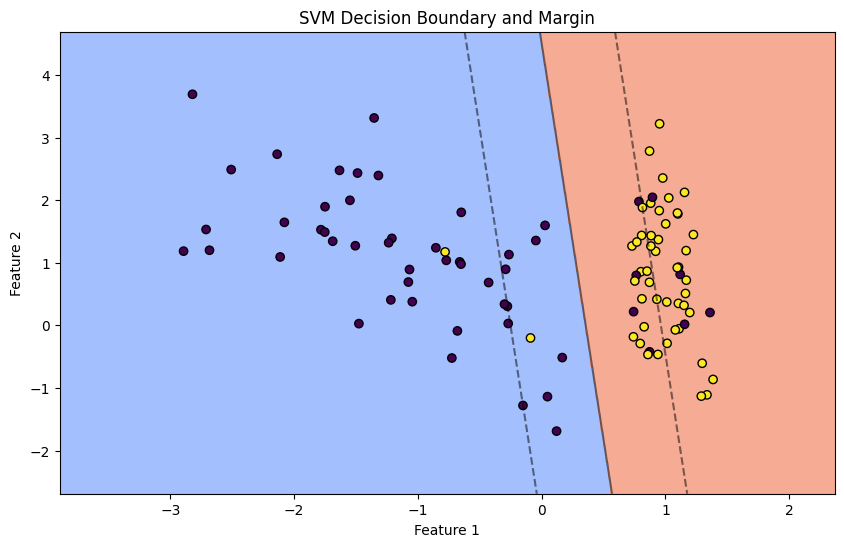

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a simple dataset
np.random.seed(0)
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                    n_redundant=0, n_clusters_per_class=1, flip_y=0.1)

# Create and train an SVM model with a linear kernel
model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0))
model.fit(X, y)

# Access the underlying SVC object to get support vectors
svm_model = model.named_steps['svc']  # 'svc' is the name of the step in the pipeline

# Define function to plot decision boundary, margin, and support vectors
def plot_svm_decision_boundary(X, y, model):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create mesh grid for plotting
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Compute decision function values
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z > 0, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    # Access the SVC object to get support vectors
    support_vectors = svm_model.support_vectors_
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                s=100, linewidth=1, facecolors='none', edgecolors='k', marker='x')

    plt.title('SVM Decision Boundary and Margin')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Visualize the decision boundary and margin
plot_svm_decision_boundary(X, y, model)
